<a href="https://colab.research.google.com/github/KruglikovAnton/megafons_clients_investigation/blob/main/megafon_investigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from scipy.stats import shapiro

![](https://sun9-32.userapi.com/C6vN5pHQW7hlseIt0AtTN7qNDQbDnHXdt1P2NA/ILntXqa-RrA.jpg)

## Codebook

`megafon.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `user_id` — идентификатор абонента;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Q1` — ответ на первый вопрос;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Q2` — ответ на второй вопрос;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Total Traffic(MB)` — объем трафика передачи данных <sup>1 </sup>; <br>
&nbsp;&nbsp;&nbsp;&nbsp; `Downlink Throughput(Kbps)` — средняя скорость «к абоненту» <sup>2 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Uplink Throughput(Kbps)`— средняя скорость «от абонента» <sup>3 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Downlink TCP Retransmission Rate(%)` — частота переотправок пакетов «к абоненту» <sup>4 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Video Streaming Download Throughput(Kbps)` — скорость загрузки потокового видео <sup>5 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Video Streaming xKB Start Delay(ms)` — задержка старта воспроизведения видео <sup>6 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Web Page Download Throughput(Kbps)` — скорость загрузки web-страниц через браузер <sup>7 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Web Average TCP RTT(ms)` — пинг при просмотре web-страниц<sup>8 </sup>.<br>


<sup>1 </sup> — Насколько активно абонент использует мобильный интернет.<br>
<sup>2 </sup> — Считается по всему трафику передачи данных.<br>
<sup>3 </sup> — Считается по всему трафику передачи данных.<br>
<sup>4 </sup> — Чем выше, тем хуже. Если в канале возникает ошибка, пакет переотправляется. Снижается полезная скорость.<br>
<sup>5 </sup> — Чем выше, тем лучше — меньше прерываний и лучше качество картинки.<br>
<sup>6 </sup> — Сколько времени пройдёт между нажатием на кнопку Play и началом воспроизведения видео. Чем меньше это время, тем быстрее начинается воспроизведение.<br>
<sup>7 </sup> — Чем выше, тем лучше.<br>
<sup>8 </sup> — Чем меньше, тем лучше — быстрее загружаются web-страницы.<br>

Первый технический показатель представлен как сумма за период в одну неделю перед участием в опросе. Остальные технические показатели отображают среднее значение по данному признаку за период в одну неделю перед участием в опросе.

In [9]:
import gdown
p = Path('/data')
p.mkdir(parents=True, exist_ok=True)

url='https://drive.google.com/uc?id=1j0n5fhxkhGjM6-2qSoJbs2G9nm_HyBuq'
output = '/data/megafon.csv'
gdown.download(url, output)


Downloading...
From: https://drive.google.com/uc?id=1j0n5fhxkhGjM6-2qSoJbs2G9nm_HyBuq
To: /data/megafon.csv
100%|██████████| 200k/200k [00:00<00:00, 22.6MB/s]


'/data/megafon.csv'

In [10]:
start_df = pd.read_csv('/data/megafon.csv')
start_df.head(5)

,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
0,1,5,NaN,775.48846,360.13,86.56,3.93,1859.15,2309,1007.82,83
1,2,5,4,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425
2,3,1,4,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485
3,4,8,3,179.18564,2590.97,325.88,0.80,7053.81,3218,1221.02,51
4,5,2,"2, 3, 4",351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68


In [11]:
start_df.describe(include='all')

,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
count,3112.000000,3110,1315,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000
unique,NaN,49,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,10,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,846,190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1556.500000,NaN,NaN,406.282339,2220.774023,170.702381,1.834518,5728.806848,2107.596080,2100.258901,194.195051
std,898.501345,NaN,NaN,220.593815,2629.824405,204.031286,2.074593,5161.475235,1582.423057,2062.509549,267.387914
min,1.000000,NaN,NaN,100.026680,13.260000,6.110000,0.050000,0.000000,239.000000,0.000000,0.000000
25%,778.750000,NaN,NaN,214.261192,652.297500,70.735000,0.720000,2324.550000,1280.000000,1018.002500,74.000000
50%,1556.500000,NaN,NaN,363.999720,1404.230000,119.435000,1.300000,4436.500000,1672.000000,1670.695000,118.000000
75%,2334.250000,NaN,NaN,572.524325,2823.645000,210.617500,2.240000,7611.440000,2312.000000,2519.987500,207.000000


В Q1 и Q2 -  49 и 51 уникальных значения из общей выборки в 3110 и 1315 значений соответственно, что связано с своим вариантом ответа или nan.

In [12]:
# Выведем все значения поля Q1
start_df.Q1.unique()

array(['5', '1', '8', '2', '3', '9', '10', '7', '4', '11', '6', '2, 9',
       '0', '1, 3', '19', '15', nan, '1, 6', '***** ** ***',
       '3 - дер.Ширяево Волоколамского района, 9 - в Москве', '10, 9',
       'Чем даль ше,тем лучше.Спасибо за ваш труд.Оценка 10 !',
       'ОЦЕНКА-3/НЕВАЖНО/', 'Отвратительно',
       'Я ценой услуг не удовлетворен', 'Пока не понял', '3, 9', '5, 6',
       '0, 1, 5', '5, 7', 'Hi',
       '4. Тульская область Заокский район. Романовские дачи связи почти нет',
       'Немагу дать атценку денги незашто снимаеть скоро выклучаю',
       '10, 50',
       'Очень  хорошо. Обслуживания  я довольно. Спасибо вам.555', '?',
       'Поохое',
       'Когда в Москве-10 а когда в калужской области в деревне Бели-1',
       'Нет', 'Да', 'Ужасно',
       '3 тройка, связь отвратительная, жалко платить за такой тарив',
       'Чдтчдтччдтччч', '3, 7', '20, 89031081392', '1, 8', 'Без з',
       '10, 5', '2, 5',
       'Я в Смол. Области живу сейчас, не пользуюсь телефоном с

Часть опрашенных отвечали на 1 вопрос в текстовой форме или числами вне списка предложенных ответов.

In [13]:
# Напишем функицю для препроцессинга значений в поле Q1
def preproc_Q1(string) -> int:
    ''' Trandform Q1 columnt to int
    '''     
    string = str(string)
    if string.split()[0].isdigit():
        if len(string.split()) > 1:
            return int(string.split()[0])
        else:
            return int(string)
    else:
      return np.nan

In [14]:
# Создадим новую колонку с использованием написанной функции
start_df['Q1_transformed'] = start_df.Q1.apply(preproc_Q1)

In [15]:
# Посмотрим на уникальные значения и их кол-во после применения функции
start_df.Q1_transformed.value_counts()

10.0    846
1.0     532
3.0     327
8.0     291
9.0     238
5.0     234
7.0     200
2.0     168
4.0     123
6.0     101
0.0      10
11.0      1
19.0      1
15.0      1
Name: Q1_transformed, dtype: int64

In [16]:
# Таким образом сформируем таблицу с обработанными данными
main_df_Q1 = start_df[(start_df.Q1_transformed < 11) & (start_df.Q1_transformed > 0)]

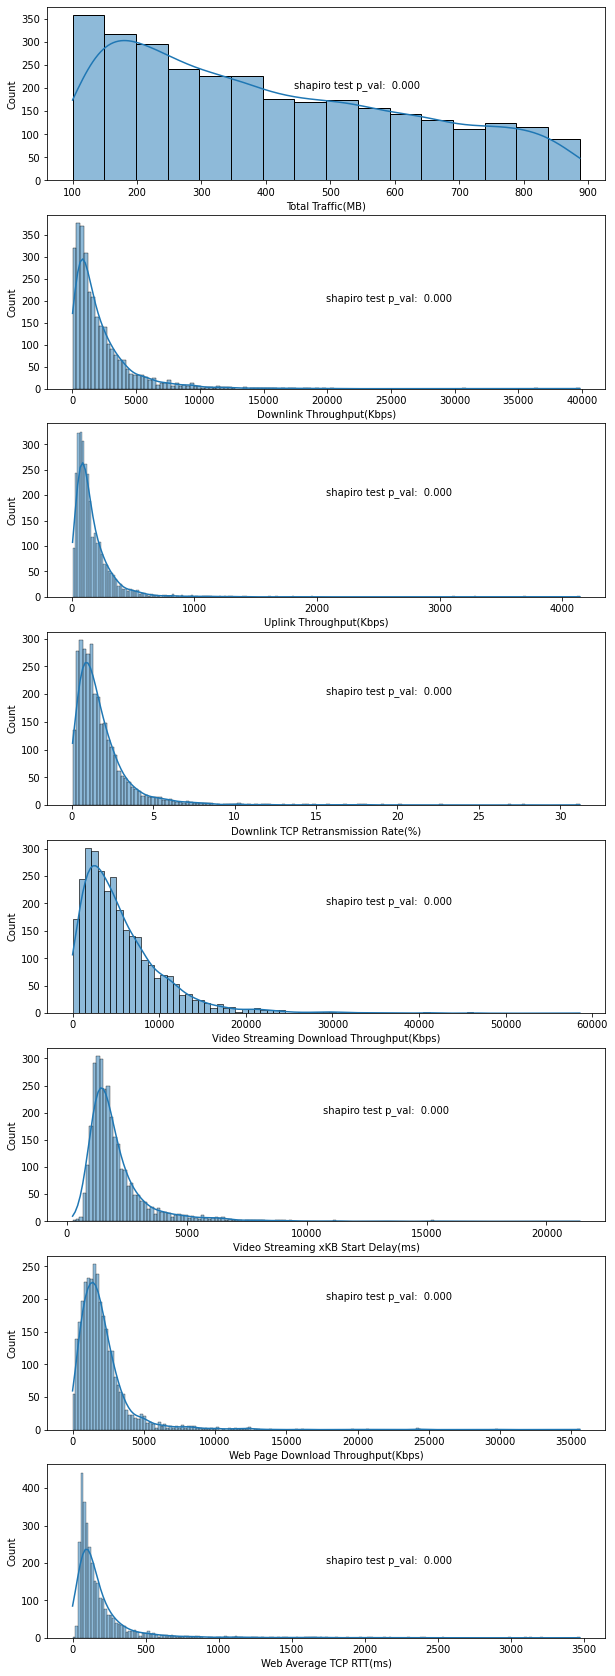

In [17]:
inv_cols_df = main_df_Q1.drop(columns=['user_id', 'Q1', 'Q2', 'Q1_transformed'])
inv_cols_len = len(inv_cols_df.columns)
inv_cols = list(inv_cols_df.columns)
fig, axs = plt.subplots(nrows=inv_cols_len, figsize=(10,30))
for i in range(inv_cols_len):
    ax = axs[i]
    values = inv_cols_df[inv_cols[i]].values
    p_val = shapiro(values).pvalue
    sns.histplot(data=inv_cols_df, x=inv_cols[i], ax=ax, kde=True)
    ax.text(values.max()/2, 200, f'shapiro test p_val: {p_val: .3f}')

Как видно из построенных графиков большинство данных имеет похожее, вытянутое вправо разпределение. Выбросов в данных распределениях нет, а данные представлены в корректном формате. Ни 1 из распределений нормальным считать нельзя.

In [18]:
# Разобьем данные на 2 группы в зависимости от ответа на 1 вопрос. В 1 группу (positive) 9-10, во вторую остальных (others).
main_df_Q1['Q1_answer'] = main_df_Q1.Q1_transformed.apply(lambda x: np.where(x in [9,10], 'positive (9 or 10)', 'others (0-8)'))
main_df_Q1.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms),Q1_transformed,Q1_answer
0,1,5,NaN,775.48846,360.13,86.56,3.93,1859.15,2309,1007.82,83,5.0,others (0-8)
1,2,5,4,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425,5.0,others (0-8)
2,3,1,4,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485,1.0,others (0-8)
3,4,8,3,179.18564,2590.97,325.88,0.80,7053.81,3218,1221.02,51,8.0,others (0-8)
4,5,2,"2, 3, 4",351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68,2.0,others (0-8)


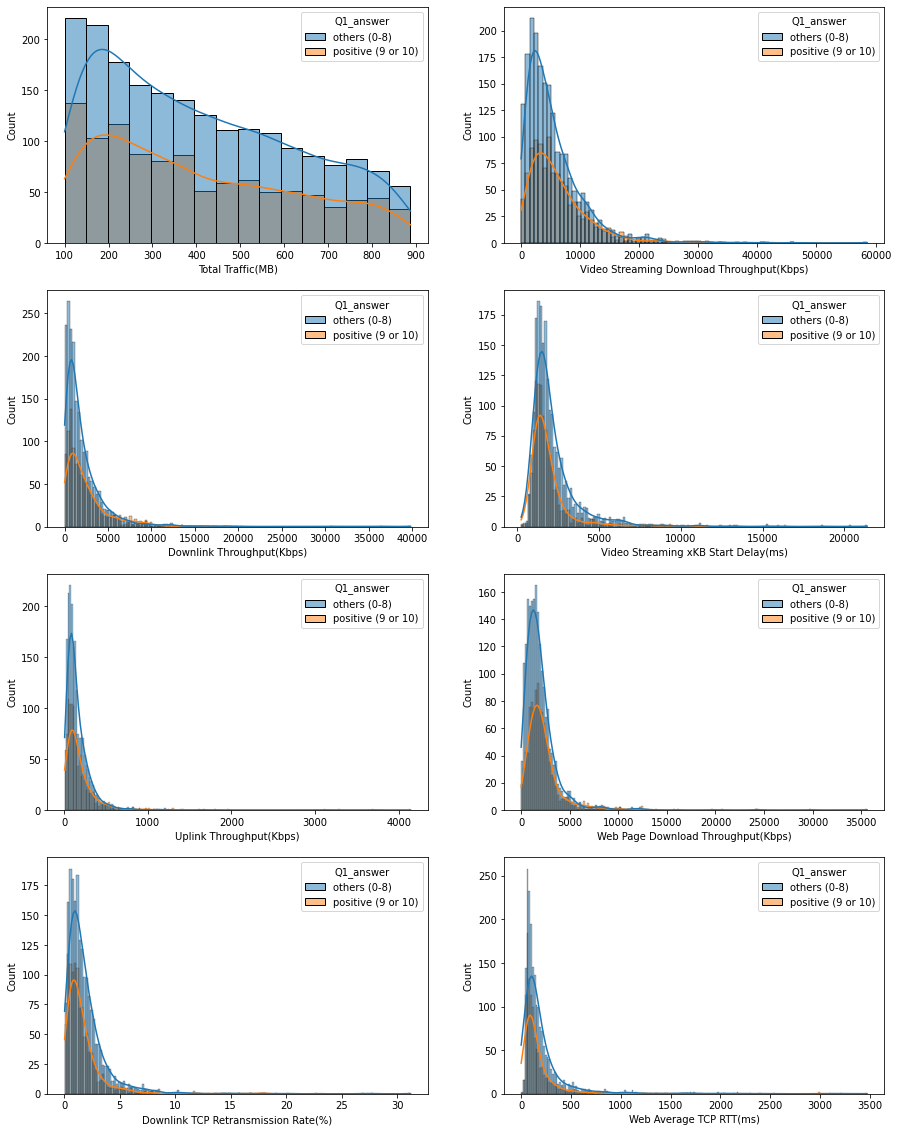

In [19]:
# Построим распределения данных, разделяя при этом пользователей на 2 созданные группы
fig, axs = plt.subplots(nrows=int(len(inv_cols) / 2), ncols=2, figsize=(15,20))
for i, column in enumerate(inv_cols):
    if i < 4:
        ax = axs[i][0]
        sns.histplot(data=main_df_Q1, x=column, hue='Q1_answer', ax=ax, kde=True, alpha=0.5)
    else:
        ax = axs[i-4][1]
        sns.histplot(data=main_df_Q1, x=column, hue='Q1_answer', ax=ax, kde=True, alpha=0.5)

На первый взгляд некоторые отличия в ряде распределений уже можно заметить. Посмотрим на **средние значения**, **медианы** и **стандартные отклонения**.

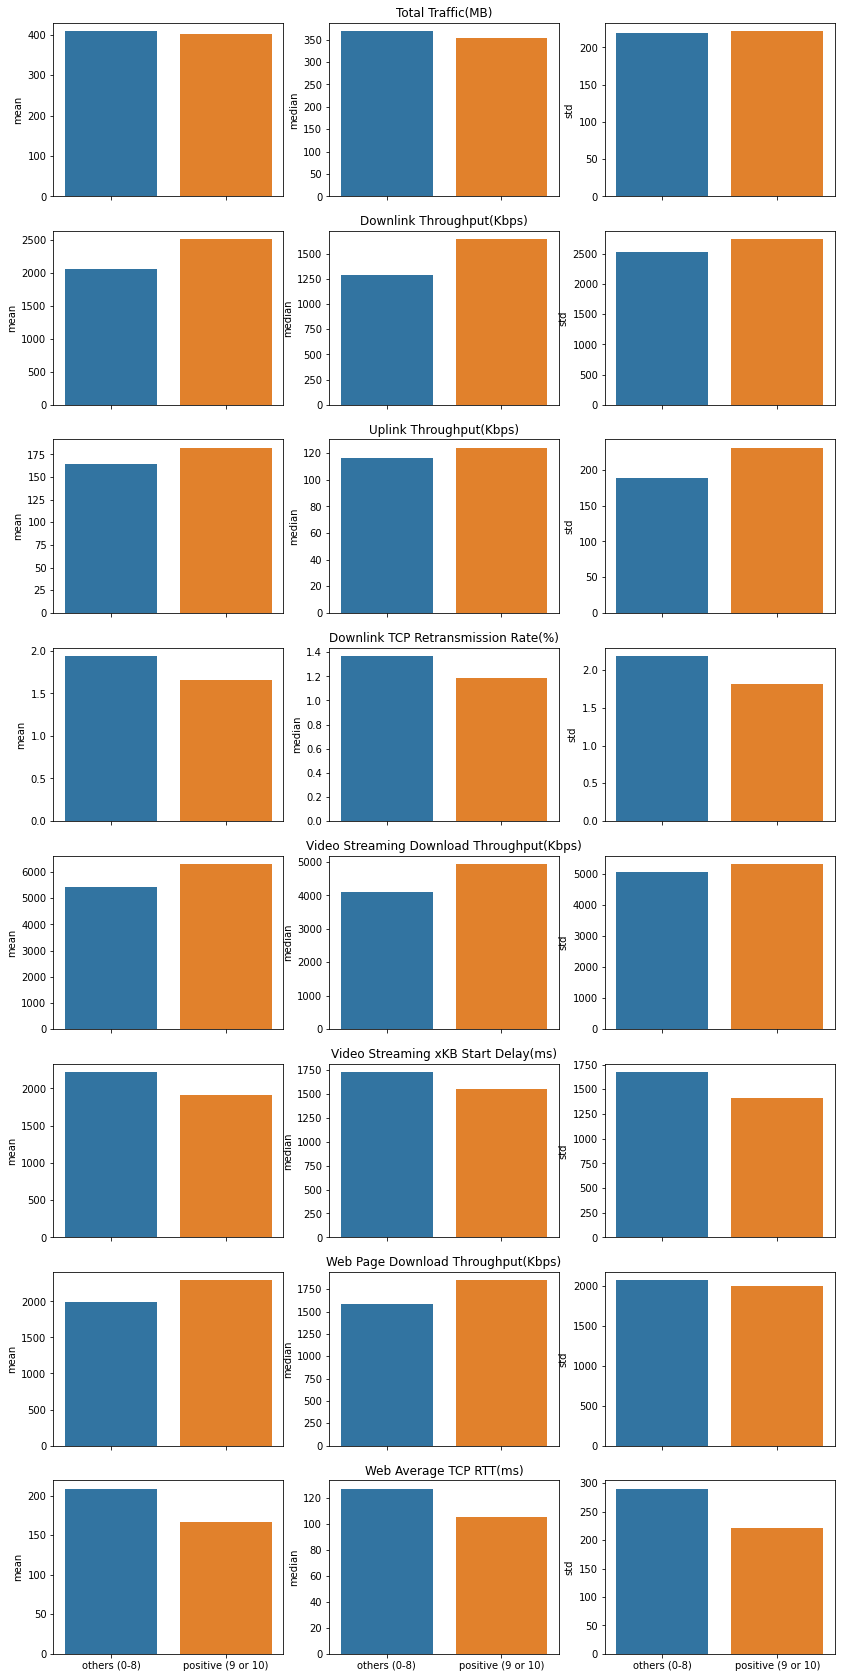

In [20]:
data_for_Q1_vis = main_df_Q1.groupby('Q1_answer').agg([np.mean,np.median,np.std])
fig, axs = plt.subplots(nrows = len(inv_cols), ncols=3, figsize=(14,30), sharex=True)
for i, column in enumerate(inv_cols):
    data = data_for_Q1_vis[column]
    sns.barplot(data=data, x=data.index, y='mean', ax = axs[i][0])
    axs[i][0].set_xlabel('')
    sns.barplot(data=data, x=data.index, y='median', ax = axs[i][1])
    axs[i][1].set_xlabel('')
    axs[i][1].set_title(column)
    sns.barplot(data=data, x=data.index, y='std', ax = axs[i][2])
    axs[i][2].set_xlabel('')

Из построенных барплотов видно: <div> 
 - Для **объема трафика** рассчитанные характеристики довольно близки
 - **Средние скорости приема и отправки** лучше у пользователей, которые оценили качество услуг выше
 - Для всех **остальных параметров** аналогично, где более высокий показатель соответствует высокому качеству, там он выше у пользователей с более высокой оценкой. Для параметров, где более низкое значение говорит о более высоком качестве, аналогично, у пользователей с более высокой оценкой, такие параметры в среднем и по медиане ниже. <div>
 -  По поводу стандартного отклонения, оно может отличаться как в одну, так и в другую сторону, но как правило, там где средние и медианные значения более высокие для одной из групп пользователей, там и стандартное отклонение выше и наоборот.

In [125]:
# Поскольку распределения не нормальные, то для расчета p-уровня значимости будем использовать бутстрап. 
# Будем сравнивать медианы показателей
def bootstrap(values_1: np.array, values_2: np.array, n_iter: int=10000):
    btstr_1 = np.random.choice(values_1, size=(len(values_1), n_iter), replace=True)
    btstr_2 = np.random.choice(values_2, size=(len(values_2), n_iter), replace=True)
    median_1 = np.median(values_1)
    median_2 = np.median(values_2)
    diff = median_1 - median_2
    diff_btst = np.median(btstr_1, axis=0) - np.median(btstr_2, axis=0)
    # Сдвигаем относительно 0
    diff_btst = diff_btst - np.mean(diff_btst)
    p_val = np.sum(diff_btst>diff) / diff_btst.size if diff > 0 else np.sum(diff_btst<diff) / diff_btst.size
    return diff, diff_btst, p_val

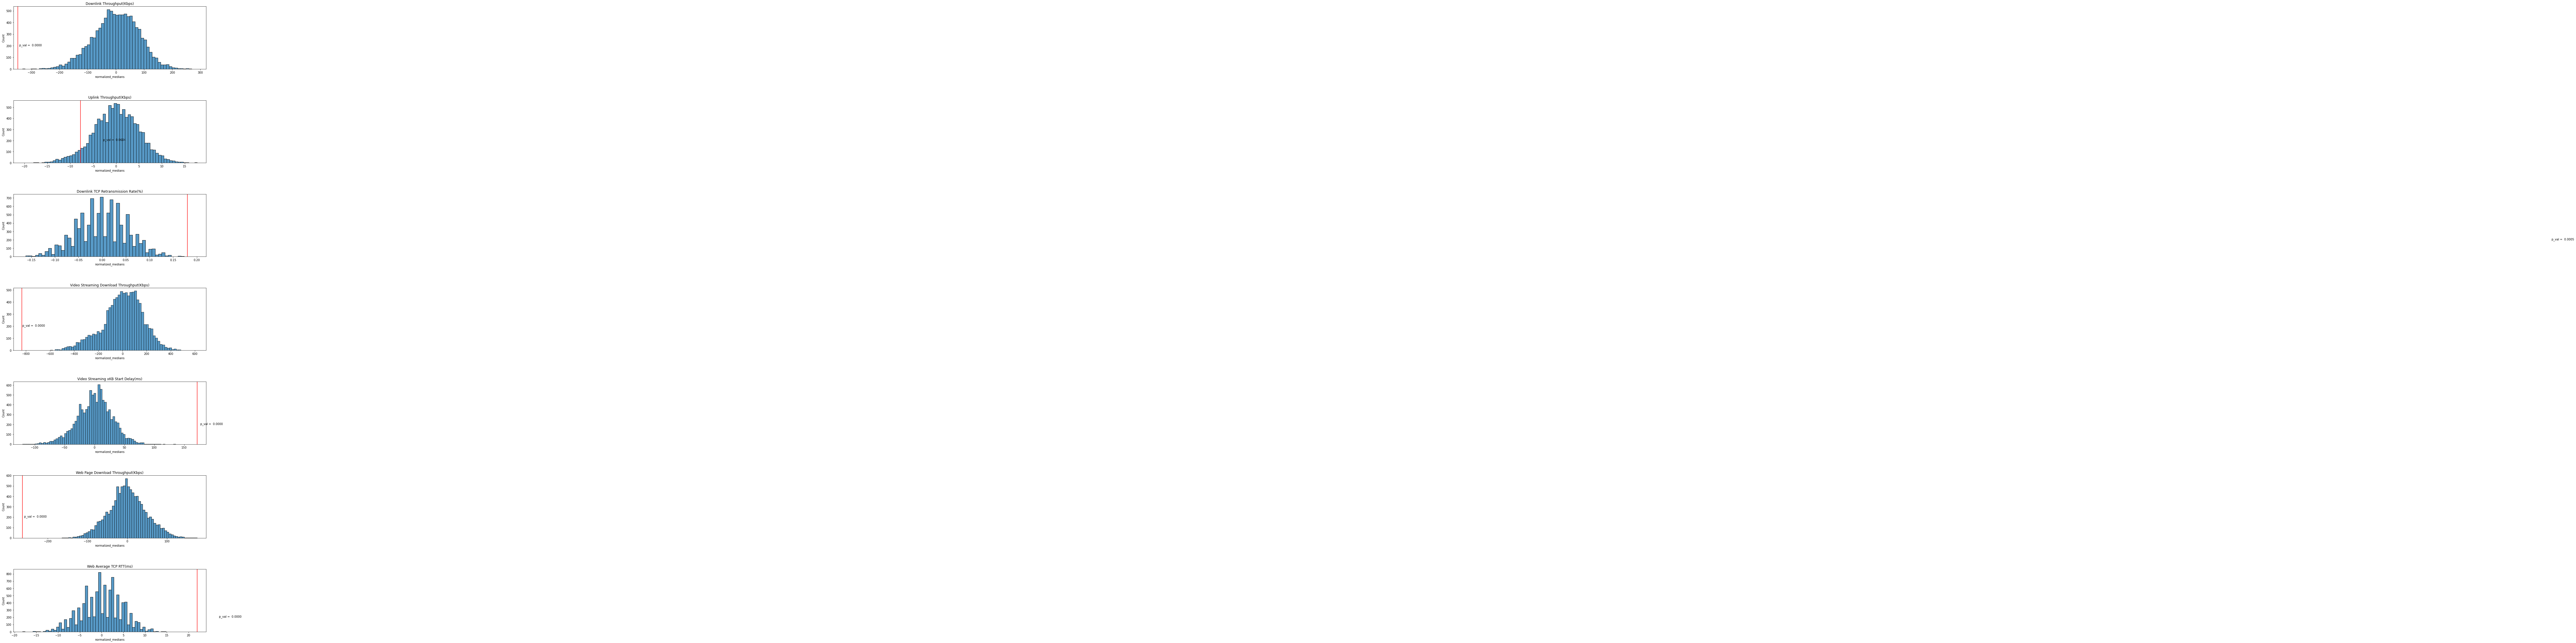

In [139]:
# Применим написанную функцию для показателя Downlink Throughput(Kbps)
plt.rcParams['figure.figsize'] = (12,40)
columns = ['Downlink Throughput(Kbps)', 'Uplink Throughput(Kbps)', 'Downlink TCP Retransmission Rate(%)', 'Video Streaming Download Throughput(Kbps)',
           'Video Streaming xKB Start Delay(ms)', 'Web Page Download Throughput(Kbps)', 'Web Average TCP RTT(ms)']
fig, axs = plt.subplots(nrows=len(columns))
for i, column in enumerate(columns):
    values_1 = main_df_Q1[main_df_Q1.Q1_answer=='others (0-8)'][column].values
    values_2 = main_df_Q1[main_df_Q1.Q1_answer=='positive (9 or 10)'][column].values
    diff, diff_btst, p_val = bootstrap(values_1, values_2)
    ax = axs[i]
    sns.histplot(diff_btst, ax=ax)
    ax.text(x=diff+5, s=f'p_val = {p_val: .4f}', y=200)
    ax.set_xlabel('normalized_medians')
    ax.set_title(column)
    ax.axvline(diff, color='red')
plt.subplots_adjust(hspace=0.5)

Таким образом при уровне доверия в 0.95% нулевую гипотезу о равенстве  параметров для довольных пользователей и недовольных можно принять только для Uplink Throughput(Kbps), для остальных случаев нулевую гипотезу стоит отвергнуть.

In [22]:
# Подключим теперь к исследованию результаты ответов на 2й вопрос
# Посмотрим, какие ответы в данной колонке встречаются
main_df_Q1.Q2.value_counts()

3                   190
4                   170
1                   168
1, 3                121
3, 4                 85
1, 3, 4              76
7                    64
1, 4                 56
3, 4, 5              45
1, 2, 3              44
1, 3, 4, 5           40
4, 5                 30
1, 4, 5              27
1, 2, 3, 4, 5        27
1, 2                 22
1, 2, 3, 4           18
2, 3                 12
2                    11
2, 3, 4              11
1, 2, 4              11
6                    10
5                     9
3, 5                  8
1, 5                  7
1, 2, 4, 5            4
1, 2, 3, 5            4
2, 4                  4
1, 2, 5               3
2, 3, 4, 5            3
1, 3, 5               3
1, 4, 7               3
3, 4, 5, 7            3
3, 4, 7               2
1, 3, 7               2
1, 3, 4, 7            2
2, 4, 5               2
3, 7                  2
1, 3, 4, 5, 7         2
1, 2, 3, 4, 5, 6      2
0, 3                  1
5, 6                  1
4, 7            

In [23]:
# Как видим, пользователи, которые оценивали услуги ниже 9, зачастую давали несколько ответов. 
# Представим ответы на 2 вопрос в виде one-hot

main_df_Q1

,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms),Q1_transformed,Q1_answer
0,1,5,NaN,775.48846,360.13,86.56,3.93,1859.15,2309,1007.82,83,5.0,others (0-8)
1,2,5,4,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425,5.0,others (0-8)
2,3,1,4,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485,1.0,others (0-8)
3,4,8,3,179.18564,2590.97,325.88,0.80,7053.81,3218,1221.02,51,8.0,others (0-8)
4,5,2,"2, 3, 4",351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68,2.0,others (0-8)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,3108,3,"1, 4, 5",519.96475,1045.70,44.61,0.47,4523.66,1468,1044.66,304,3.0,others (0-8)
3108,3109,3,"1, 3, 4, 5",171.52629,670.32,40.94,2.35,1711.54,2780,954.91,251,3.0,others (0-8)
3109,3110,10,NaN,187.44936,590.29,186.36,2.06,3182.83,2195,1094.62,109,10.0,positive (9 or 10)
3110,3111,6,"1, 3",827.74515,1841.90,373.53,1.21,5675.93,1905,2361.88,202,6.0,others (0-8)


In [ ]:
main_df_Q1

In [ ]:
# Поскольку распределения наших данных далеки он нормальных, то мы весьма ограничены в выборе статистических тестов.
# 
def bootstrap_with_vis()

In [ ]:
data_for_Q1_vis['user_id']

,mean,median,std
Q1_answer,,,
others (0-8),1545.053644,1543.5,905.973096
positive (9 or 10),1575.815498,1572.0,883.672077


Как видно из отсортированной таблицы существуют значения, где в Q1 и Q2 присутствуют nan, а также значения, в которых в Q1 0, а в Q2 nan. На данном этапе уберем подобные значения.

In [ ]:
main_df = start_df[start_df.Q1.isin(list(map(str, list(range(1,10)))))]
main_df.describe(include='all')

,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms),Q1_transformed
count,2212.000000,2212,1315,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
unique,NaN,9,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,532,190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1550.855787,NaN,NaN,406.874669,2124.960583,166.909616,1.893883,5545.694467,2180.950723,2033.317260,205.394213,4.512206
std,903.579921,NaN,NaN,220.219906,2651.983293,197.933775,2.136465,5167.476663,1627.258571,2075.900274,287.097489,2.872905
min,1.000000,NaN,NaN,100.035380,13.260000,6.110000,0.060000,0.000000,375.000000,0.000000,0.000000,1.000000
25%,755.750000,NaN,NaN,214.712665,619.152500,68.560000,0.740000,2142.767500,1315.000000,959.305000,77.000000,2.000000
50%,1553.500000,NaN,NaN,365.108435,1323.820000,116.835000,1.330000,4210.315000,1704.500000,1606.125000,123.000000,4.000000
75%,2339.250000,NaN,NaN,571.239005,2651.342500,208.072500,2.320000,7355.372500,2425.000000,2475.180000,215.000000,7.000000
